## Import necessary libraries

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split  #To split the dataset
from sklearn.preprocessing import StandardScaler  #For scaling the input data

## Loading dataset

In [4]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data preprocessing
Separate the features(pixel values) and labels(digits) from the training data. Normalizing the pixel values by dividing them by 255 so that the values range from 0 to 1.

In [5]:
# Separating the labels (y) from the features (X)
X = train_data.drop(columns=['label'], axis=1)
y = train_data['label']

# Normalizing the pixel values (between 0 and 1)
X = X / 255.0

# Reshaping X to be 3D - (number of images, 28, 28, 1) for the CNN input
X = X.values.reshape(-1, 28, 28, 1)

# Converting labels to one-hot encoded vectors
y = to_categorical(y, num_classes=10)

### Train-test split

In [6]:
# Spliting the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (33600, 28, 28, 1)
Validation data shape: (8400, 28, 28, 1)


## Building CNN model
Fit the model to the training data and validate it on the validation set.

In [7]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))  # Input layer with the correct shape

# Adding Convolutional Layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Adding Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [18]:
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy',
                             save_best_only=True, mode='max')

history = model.fit(X_train, y_train, epochs=10, batch_size=64, 
                    validation_data=(X_val, y_val), callbacks=[checkpoint])


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.9913 - loss: 0.0250 - val_accuracy: 0.9895 - val_loss: 0.0372
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - accuracy: 0.9915 - loss: 0.0249 - val_accuracy: 0.9889 - val_loss: 0.0431
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9902 - val_loss: 0.0379
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.9928 - loss: 0.0211 - val_accuracy: 0.9904 - val_loss: 0.0382
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step - accuracy: 0.9923 - loss: 0.0204 - val_accuracy: 0.9906 - val_loss: 0.0393
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9896 - val_loss: 0.0450
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.9910 - val_loss: 0.0379
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 46s 87ms/step - accuracy: 0.9953 - loss: 0.0147 - 

In [19]:
# Get the highest validation accuracy across all epochs
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_val_accuracy * 100:.2f}%")

Best Validation Accuracy: 99.12%


## Plot Training History

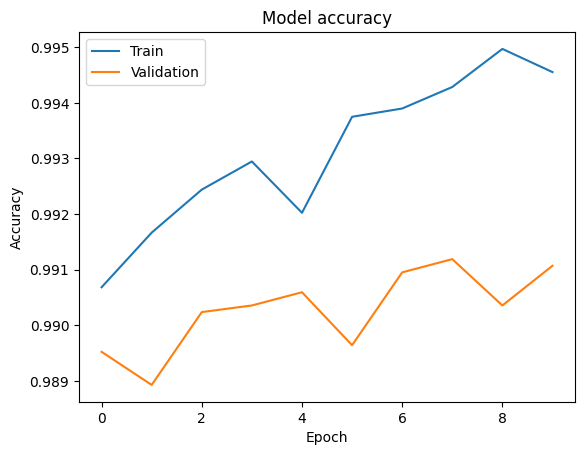

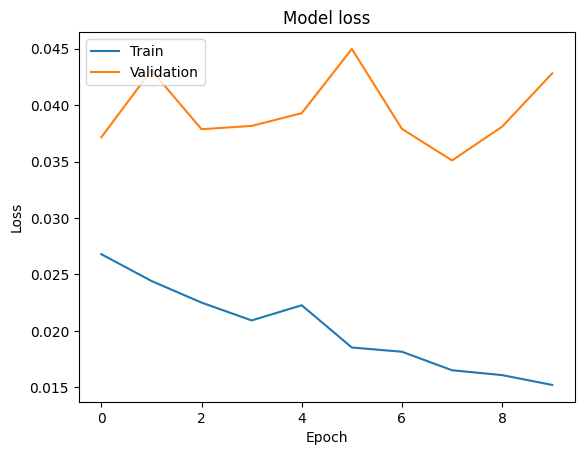

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prepare test data

In [11]:
# Normalize the test data and reshape it for the model
X_test = test_data / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)

## Make predictions

In [22]:
model.load_weights('best_model.keras') #Loads the best model

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step


## Prepare submission dataframe

In [26]:
digit_recognizer_submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1),
                           'Label': predicted_labels})

digit_recognizer_submission.to_csv('digit_recognizer_submission.csv', index=False)
digit_recognizer_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
